# Run the whole deltas algorithm

In [512]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

Breast Cancer: 569
Classes total: 357 - 212

Classes train: 249 - 148
Classes test:  108 - 64


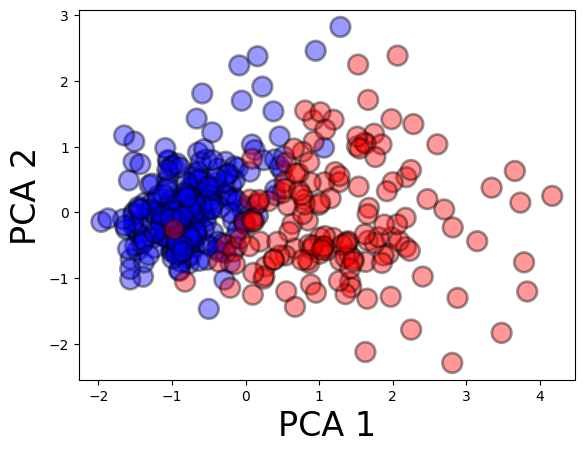

In [513]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[2]  # change ind to select dataset to use
model = 'MLP'

dataset = datasets[4]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'MLP-deep'

dataset = datasets[0]  # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP'
# model = 'Linear'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

Tuning SVM params with 5 fold CV
Best SVM params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Original


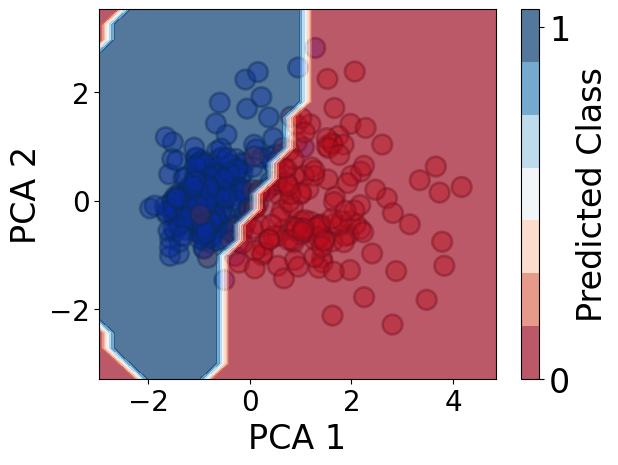

SMOTE


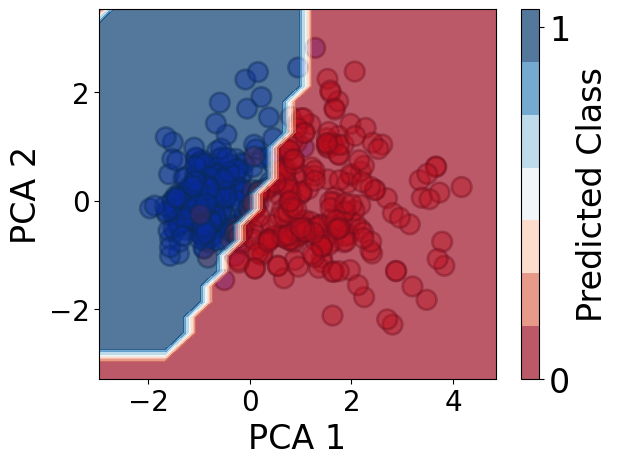

Balanced Weights


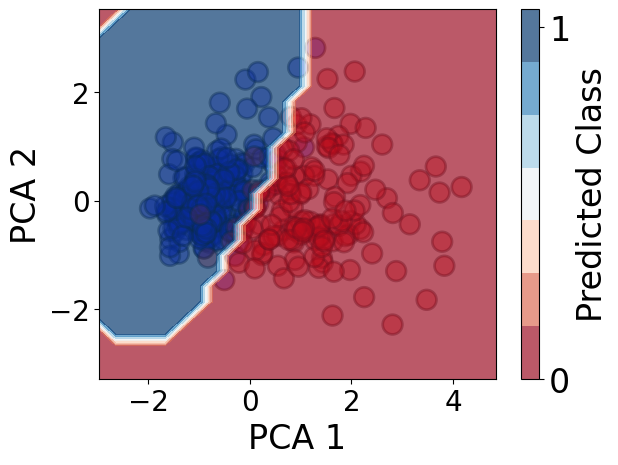

Bayes Minimum Risk (calibrated)


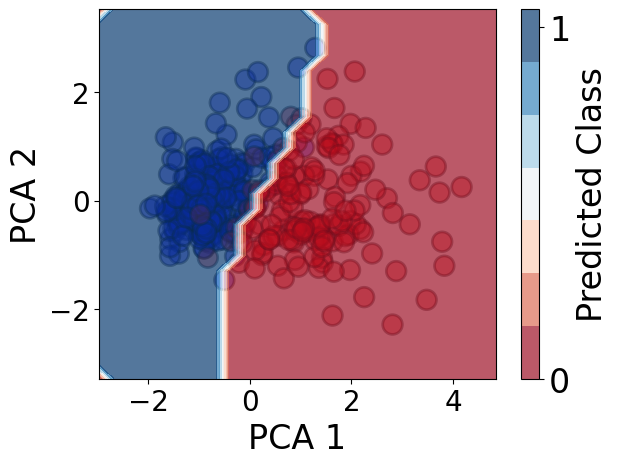

Bayes Minimum Risk


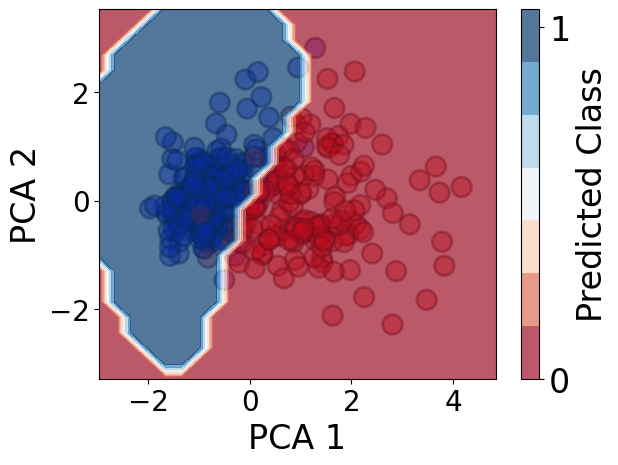

Thresholding


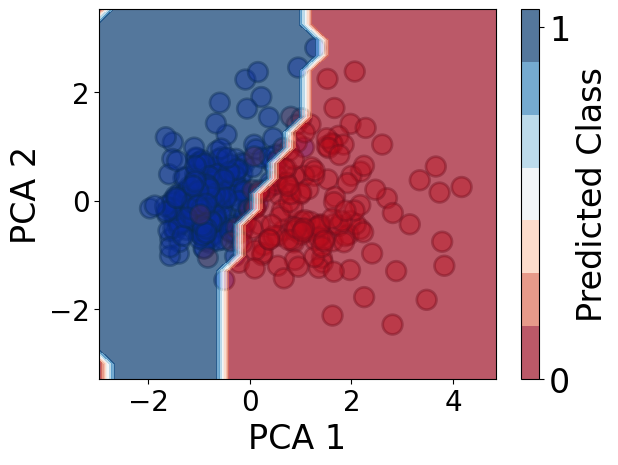

In [514]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Original']

## Fit deltas

Original Data


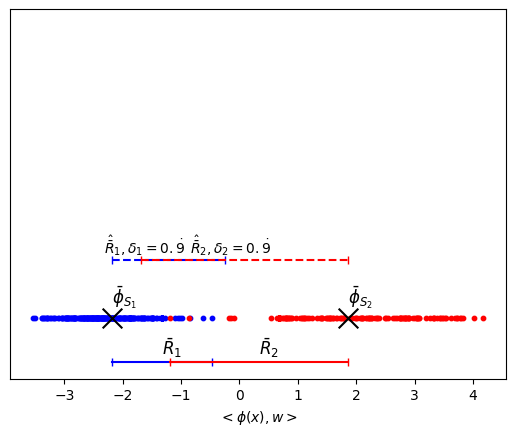

Trying random downsampling deltas (multiprocessing batches of 8):   4%|▍         | 1/24 [00:00<00:07,  3.17it/s]

Budget 198 found 158 viable downsampled solutions
Best solution found by removing 15 data points
Downsampled Data:


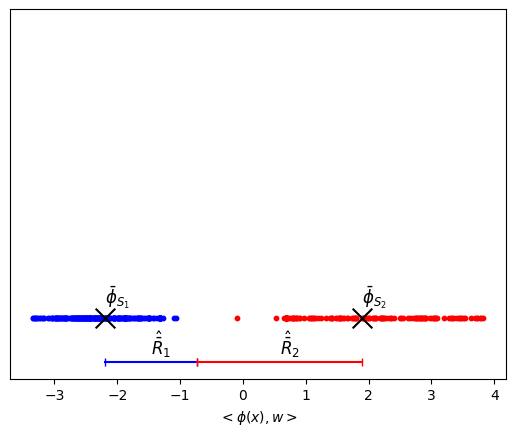

In [515]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

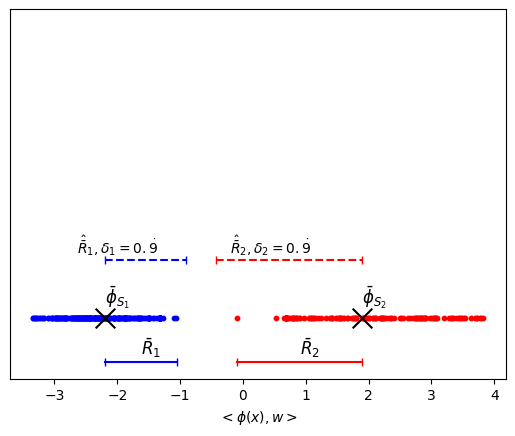

In [516]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [517]:
deltas_model.print_params()

Parameters
                R:  3.8282054569662356
                N1: 240
                N2: 142
                R1: 1.1500634023736822
                R2: 1.9867483944924034
                M:  0.9594748864509779
                D:  4.0962866833170635
                C1: 1
                C2: 1


# Evaluation on test data

                                 Accuracy    G-Mean   ROC-AUC        F1
Method                                                                 
Original                         0.982558  0.976281  0.976562  0.976000
SMOTE                            0.976744  0.971751  0.971933  0.968254
Balanced Weights                 0.976744  0.971751  0.971933  0.968254
Bayes Minimum Risk (calibrated)  0.982558  0.976281  0.976562  0.976000
Bayes Minimum Risk               0.982558  0.976281  0.976562  0.976000
Thresholding                     0.982558  0.976281  0.976562  0.976000
Our Method                       0.976744  0.971751  0.971933  0.968254 


Original


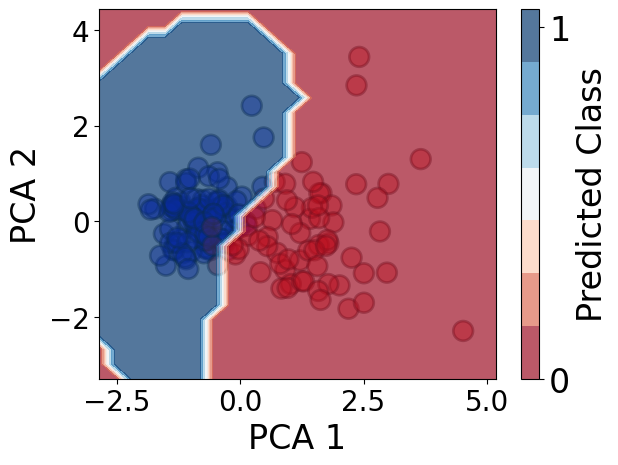

SMOTE


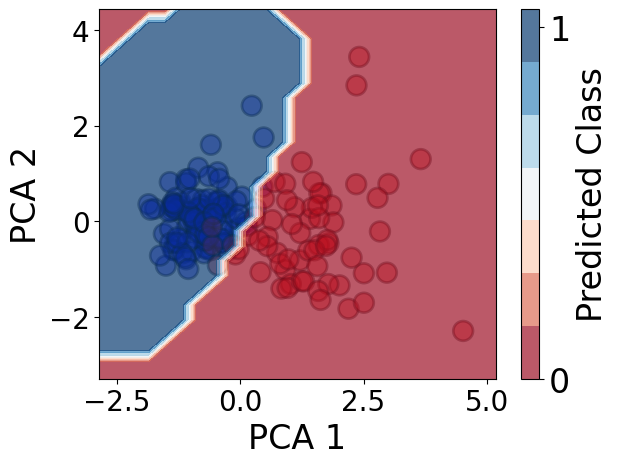

Balanced Weights


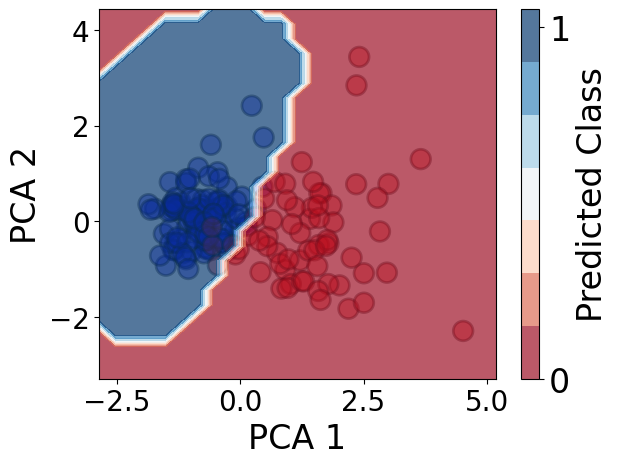

Bayes Minimum Risk (calibrated)


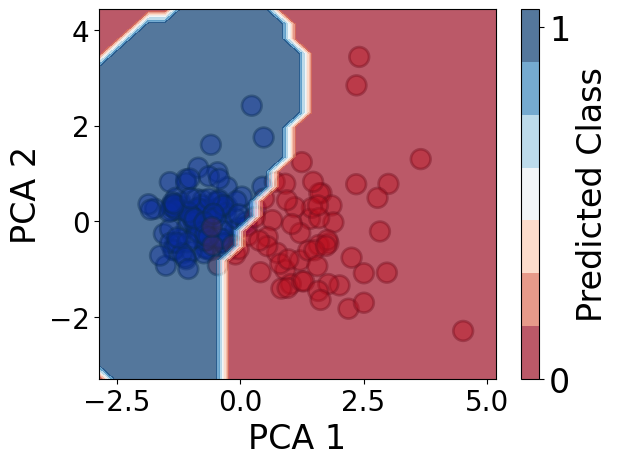

Bayes Minimum Risk


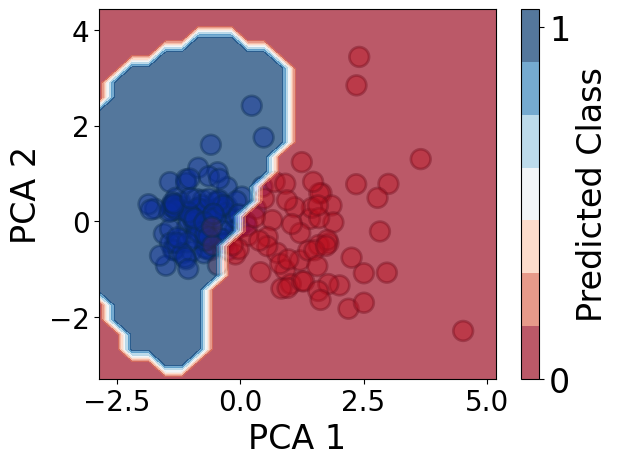

Thresholding


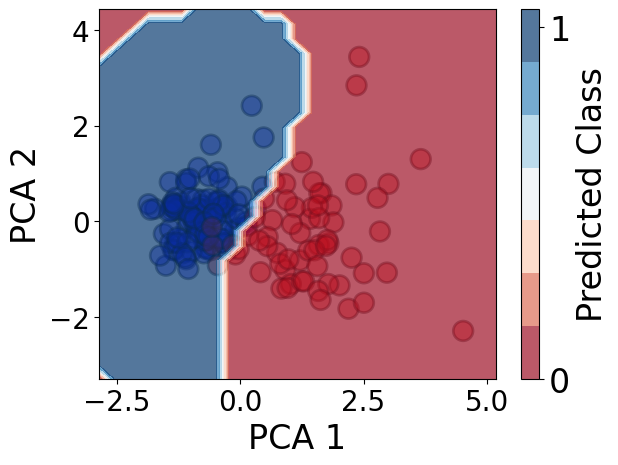

Our Method


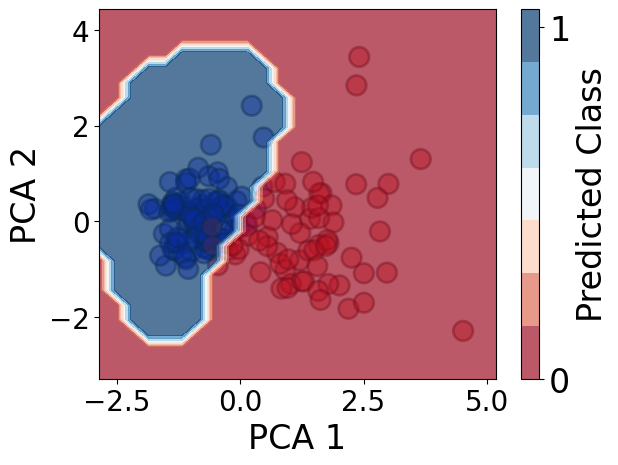

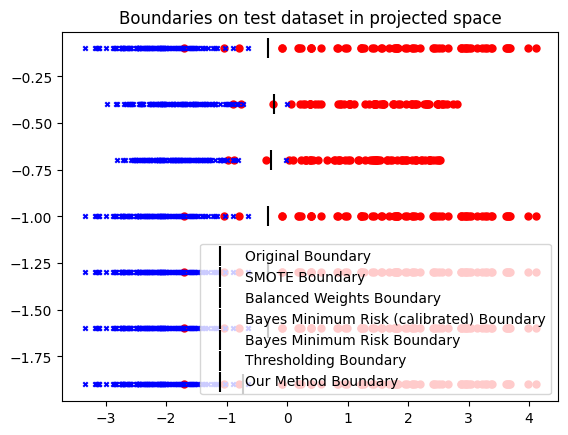

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.9826 & 0.9763 & 0.9766 & 0.9760 \\
SMOTE & 0.9767 & 0.9718 & 0.9719 & 0.9683 \\
Balanced Weights & 0.9767 & 0.9718 & 0.9719 & 0.9683 \\
Bayes Minimum Risk (calibrated) & 0.9826 & 0.9763 & 0.9766 & 0.9760 \\
Bayes Minimum Risk & 0.9826 & 0.9763 & 0.9766 & 0.9760 \\
Thresholding & 0.9826 & 0.9763 & 0.9766 & 0.9760 \\
Our Method & 0.9767 & 0.9718 & 0.9719 & 0.9683 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.982558,0.976281,0.976562,0.976000
SMOTE,0.976744,0.971751,0.971933,0.968254
Balanced Weights,0.976744,0.971751,0.971933,0.968254
Bayes Minimum Risk (calibrated),0.982558,0.976281,0.976562,0.976000
Bayes Minimum Risk,0.982558,0.976281,0.976562,0.976000
Thresholding,0.982558,0.976281,0.976562,0.976000
Our Method,0.976744,0.971751,0.971933,0.968254


In [518]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])